<a href="https://colab.research.google.com/github/yellayujin/studying/blob/main/240222_ML5(%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀
- 통계의 회귀: 가정, 회귀계수의 유의 여부가 중요
- 머신러닝의 회귀: 평가지표(RMSE, R^2)가 중요
- -> 원리는 동일
## 일반선형회귀
- 최소제곱법-잔차 0인 회귀식을 만드는 것이 best
- 규제(Penalty) 적용 X
- 릿지: L2규제, 예측영향력이 큰 피처의 영향력을 감소시키는 게 목적
- 라쏘: L1규제, 예측영향력이 작은 피처를 아예 0으로 만들어서 선택되지 않게
- 엘라스틱넷: L1+L2
## 경사하강법(Gradient Descent)
- 비용 함수(Cost Function)가 최소가 되는 W파라미터를 구하는 방법
- 비용함수(2차함수)의 미분(=기울기)이 최소인 점 = 비용함수가 최소인 지점

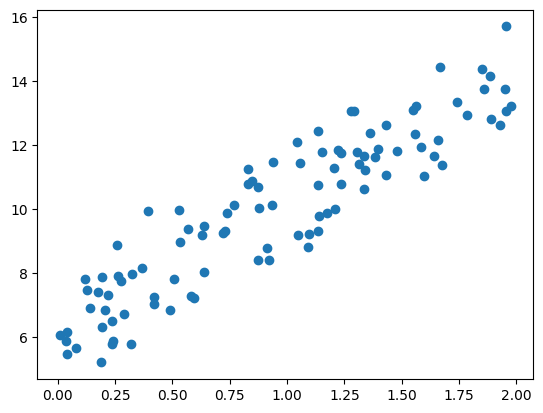

In [ ]:
# 경사하강법의 기본 코드
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# jupyter lab에서 명령 셀 바로 아래에 그래프 나오게

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [ ]:
# 예측 오차 비용을 계산을 수행하는 함수 생성
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)) / N
    return cost

- w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성
-
예측 배열 y_pred는 np.dot(X, w1.T) + w0 임 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내
임- .
새로운 w1과 w0를 update함

In [ ]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [ ]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

In [ ]:
# 반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [ ]:
#경사 하강법 수행
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

# 일정 수준(1000정도) 넘어가면 비용함수 변화 크게 없음.

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


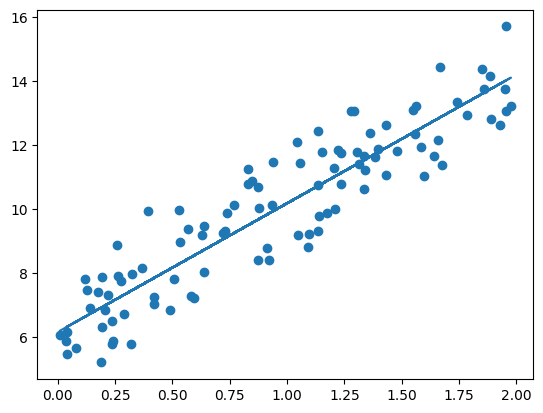

In [ ]:
plt.scatter(X, y)
plt.plot(X,y_pred)

- 대용량 데이터의 경우 대부분 미니 배치 확률적 경사 하강법 이용
- 미니 배치 확률적 경사 하강법: 한꺼번에 학습하지 않고, 나누어 학습

In [ ]:
# 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    # batch_size=10: 몇 번 나누어 학습할지
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
# 1000->10000으로 하니 소폭 상승. 늘 감소하지는 않을 수 있음 cuz of 배치사이즈(=학습횟수=많이 크면 과적합)
# 과적합 그래프 참고
# but 수렴하는 중인 것은 맞음
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### 데이터 불러오기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
# from sklearn.datasets import load_boston
# import warnings
# warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
# %matplotlib inline

'''
# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
'''

bostonDF = pd.read_csv('./data/boston.csv')
print('Boston 데이타셋 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


- CRIM: 지역별 범죄 발생률
-
ZN: 25,000평방피트를 초과하는 거주 지역의 비율-
NDUS: 비상업 지역 넓이 비- 율
CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 - 0)
NOX: 일산화질소-  농도
RM: 거주할 수 있는 - 방 개수
AGE: 1940년 이전에 건축된 소유 주- 택의 비율
DIS: 5개 주요 고용센터까지의-  가중 거리
RAD: 고속도로-  접근 용이도
TAX: 10,000- 달러당 재산세율
PTRATIO: 지역의 교사- 와 학생 수 비율
B: 지역- 의 흑인 거주 비율
LSTAT- : 하위 계층의 비율
MEDV: 본인 소유의 주택 가격(중앙값)
각 컬럼별로 주택가격에 미치는 영향도를 조사

In [ ]:
# MEDV -> PRICE로 변경
bostonDF = bostonDF.rename(columns = {'MEDV':'PRICE'})
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

### 평가지표
- RMSE는 MSE에 sqrt취해서 구해야

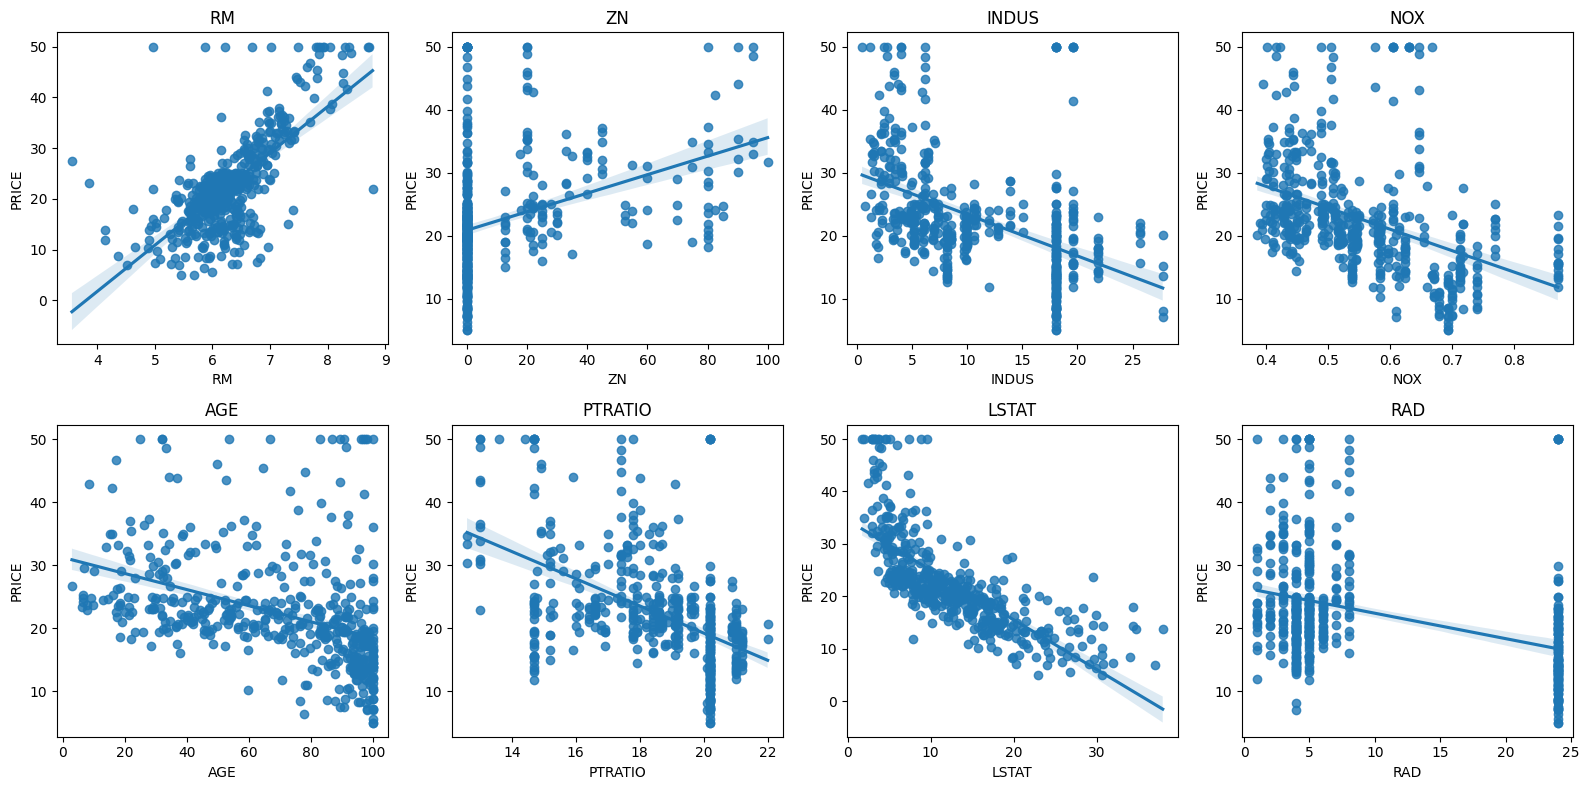

In [ ]:
fig, ax = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # print(row, col) 각 캔버스의 행, 열 인덱스 번호 출력
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=ax[row][col])
    ax[row][col].set_title(feature)

plt.tight_layout()
plt.show()

## Pipeline 코드(회귀)로 변경
- 문자 컬럼은 아직 없음
- LinearRegression 사용

In [ ]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
data = bostonDF.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  PRICE    394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [ ]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

print(X.shape, y.shape)

(394, 13) (394,)


In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=0, test_size=0.3)
print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)

(275, 13) (119, 13) (275,) (119,)


In [ ]:
numbers_df = X.select_dtypes(include=np.number)

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
param_grid = {}

column_transformer = ColumnTransformer([
    ('scaler', RobustScaler(), numbers_df.columns)], remainder = 'passthrough')

pipeline = Pipeline([('preprocessor', column_transformer), ('regressor', LinearRegression())])

random_search = RandomizedSearchCV(
    estimator = pipeline,
    random_state=0,
    param_distributions = param_grid,
    n_iter=3,
    cv = 3,
    verbose=3,
    n_jobs = -1 # CPU cores를 모두 사용하겠다는 뜻
)

# 모형학습
random_search.fit(X_tr, y_tr)

# 예측값 산출
predictions = random_search.predict(X_te)

# 모형평가
mse = mean_squared_error(y_te, predictions)
print(mse**(1/2))

C:\Users\skrtk\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
4.887179417986755


In [ ]:
# 강사
'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import numpy as np

bostonDF = pd.read_csv("data/boston.csv")
# print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF = bostonDF.rename(columns = {"MEDV": "PRICE"})

missing_cols = ["CRIM", "ZN", "INDUS", "CHAS", "AGE", "LSTAT"]

for col in missing_cols:
    bostonDF[col] = bostonDF[col].fillna(bostonDF[col].mean())

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# RandomizedSearchCV() 에 대입
param_grid = {'verbose' : [0, 1, -1]}

# ColumnTransformer
column_transformer = ColumnTransformer([
    ("scaler", RobustScaler(), X_data.columns), # scaler
   #  ("ohc_encoder", OneHotEncoder(), ['Warehouse_block', 'Mode_of_Shipment', 'Gender']), # 명목척도 처리
   # ("pd_imp_encoder", OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['Product_importance']), # 서열척도 처리
], remainder = 'passthrough')

pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', LinearRegression())
])

# Grid Search 코드 스타일은 비슷(99% 비슷)
random_search = RandomizedSearchCV(
    estimator = pipeline,
    param_distributions = param_grid,
    n_iter = 3,
    scoring = 'neg_mean_absolute_error', # 잘 모르겠다. 시험장에서는 디폴트 값으로 accuracy
    cv = 3,
    verbose=3,
    n_jobs = -1 # CPU cores 모두 사용하겠다는 뜻
)

# 모형학습
# pipeline.fit(X_train, y_train)
random_search.fit(X_train, y_train)

preds = random_search.predict(X_test)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(mse, np.sqrt(mse), r2)
'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error, r2_score\n\ny_target = bostonDF[\'PRICE\']\nX_data = bostonDF.drop([\'PRICE\'],axis=1,inplace=False)\n\nX_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.metrics import roc_auc_score\nfrom lightgbm import LGBMClassifier\nimport numpy as np\n\nbostonDF = pd.read_csv("data/boston.csv")\n# print(\'Boston 데

# Palmerpenguins로 회귀 실습

In [ ]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins['ID'] = penguins.reset_index().index + 1
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,ID
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,4
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,5


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
 8   ID                 344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [ ]:
penguins = penguins.dropna()

In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,ID
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042,174.324324
std,5.468668,1.969235,14.015765,805.215802,0.812944,98.386547
min,32.100000,13.100000,172.000000,2700.000000,2007.000000,1.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000,90.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000,173.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000,259.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000,344.000000


In [ ]:
X = penguins.drop(['body_mass_g','ID'], axis=1)
y = penguins['body_mass_g']

print(X.shape, y.shape)

(333, 7) (333,)


In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=0, test_size=0.3)
print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)

(233, 7) (100, 7) (233,) (100,)


In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
param_grid = {}

numbers_df = X.select_dtypes(include=np.number)
object_df = X.select_dtypes(exclude=np.number)

# ColumnTransformer
column_transformer = ColumnTransformer([
    ('scaler', RobustScaler(), numbers_df.columns), # scaler
    ('ohc_encoder', OneHotEncoder(drop='first'), object_df.columns), # 명목척도 처리
], remainder = 'passthrough')

pipeline = Pipeline([('preprocessor', column_transformer), ('regressor', LinearRegression())])

random_search = RandomizedSearchCV(
    estimator = pipeline,
    random_state=0,
    param_distributions = param_grid,
    n_iter=3,
    cv = 3,
    verbose=3,
    n_jobs = -1 # CPU cores를 모두 사용하겠다는 뜻
)

# 모형학습
random_search.fit(X_tr, y_tr)

# 예측값 산출
predictions = random_search.predict(X_te)

# 모형평가
mse = mean_squared_error(y_te, predictions)
print(mse**(1/2))

# from sklearn.metrics import root_mean_squared_error
# root_mean_squared_error(y_te, predictions) 되네?

C:\Users\skrtk\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
280.6877743627826


In [ ]:
# 참고 코드

In [ ]:
import pandas as pd

X_train = pd.read_csv("data/penguin_reg_X_train.csv")
X_test = pd.read_csv("data/penguin_reg_X_test.csv")
y_train = pd.read_csv("data/penguin_reg_y_train.csv")

In [ ]:
X_train.columns

Index(['ID', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'sex', 'year'],
      dtype='object')

In [ ]:
X_train.head(1)

,ID,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,year
0,28,Adelie,Biscoe,40.5,17.9,187.0,female,2007


In [ ]:
y_train.head(1)

,body_mass_g
0,3200.0


In [ ]:
X_test.head(1)

,ID,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,year
0,31,Adelie,Dream,39.5,16.7,178.0,female,2007


In [ ]:
X_train_id = X_train.pop('ID')
X_test_id = X_test.pop('ID')
X_train_id

0       28
1      296
2      306
3       63
4      183
      ... 
228    196
229     78
230    113
231    282
232    109
Name: ID, Length: 233, dtype: int64

In [ ]:
# 컬럼 분리
import numpy as np
cat_cols = X_train.select_dtypes(exclude = np.number).columns.tolist()
print(cat_cols)

num_cols = X_train.select_dtypes(include = np.number).columns.tolist()
print(num_cols)

['species', 'island', 'sex']
['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'year']


In [ ]:
X_train['year'].value_counts()   # 일단 엄밀히는 숫자형은 아님 & body_mass_g랑...연년이 큰 의미 없을 가능성
num_cols.remove('year')
# 하지만 위는 추측임!!
# 평균의 차이가 있는지 없는지 확인하려면, 분산분석, 시각화하고 난 후 제거할지 말지 결정해야!!!!

In [ ]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train['body_mass_g'], random_state=0, test_size=0.3, stratify=X_train['sex'])
# 꼭 stratify에 종속변수만 들어가라는 법은 없음. 독립변수에 대해서도 층화추출 가능(지금은 그게 가능하다는거 보여주기용)

X_tr.shape, X_val.shape, y_tr.shape, y_val.shape


((163, 7), (70, 7), (163,), (70,))

In [ ]:
import sklearn
sklearn.__version__

'1.4.1.post1'

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# from sklearn.utils.fixes import loguniform
from scipy.stats import loguniform
from sklearn.metrics import make_scorer, mean_squared_error  # make_scorer: 사용자 정의함수로 평가지표 만들 때
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

import numpy as np

# 최신버전에서는 root_mean_squared_error 제공, 돌아가면 아래 scoring에 ‘neg_root_mean_squared_error’
def rmse(y_tr, y_val):
    return np.sqrt(mean_squared_error(y_tr, y_val))

param_grid = {
    "clf__learning_rate": loguniform(0.0001, 0.1),
    "clf__n_estimators" : np.arange(30, 50),
    "clf__max_depth" : np.arange(3, 30, 2),
    "clf__num_leaves" : np.arange(30, 50),
    "clf__min_split_gain" : np.arange(0, 1.1, 0.1),
    "clf__subsample" : np.arange(0.6, 1.0, 0.1)
}

column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), num_cols),
    ("ohd_encoder", OneHotEncoder(), cat_cols)
], remainder="passthrough")

pipeline = Pipeline([
    ("preprocessing", column_transformer),
    ("clf", LGBMRegressor(random_state=42))
])

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions = param_grid,
    n_iter = 10,
    # scoring = 'neg_root_mean_squared_error',   # 이것도 됨
    scoring = make_scorer(rmse, greater_is_better=False), # 값이 크면 좋을 때=True
    cv=5,
    verbose=0,
    n_jobs=-1
)

random_search.fit(X_tr, y_tr)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 163, number of used features: 12
[LightGBM] [Info] Start training from score 4233.588957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               StandardScaler(),
                                                                               ['bill_length_mm',
                                                                                'bill_depth_mm',
                                                                                'flipper_length_mm']),
                                                                              ('ohd_encoder',
                                                                               OneHotEncoder(),
                                                                               ['species',
                                                                                'island',
                                                                                'sex'])])),
                                             ('clf',
                                              LGBMRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'clf__lear...
                                        'clf__min_split_gain': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'clf__n_estimators': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]),
                                        'clf__num_leaves': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]),
                                        'clf__subsample': array([0.6, 0.7, 0.8, 0.9])},
                   scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [ ]:
# 평가 확인
def get_score(model, X_tre, X_val, y_tr, y_val):
    tr_pred = model.predict(X_tr)
    val_pred = model.predict(X_val)
    tr_score = rmse(y_tr, tr_pred)
    val_score = rmse(y_val, val_pred)
    return f'train: {tr_score}, validation: {val_score}'

get_score(random_search, X_tr, X_val, y_tr, y_val)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


'train: 261.7059311375545, validation: 320.43628462943803'

# SMOTE
- 데이터셋의 불균형 해결
- 주의! 반드시 학습 데이터셋만 오버샘플링-> Data Leakage개념과 연관(올바른 검증/테스트가 될 수 없음)

# 스태킹 앙상블

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error

tips_df = sns.load_dataset('tips')

X = tips_df.drop(columns=['tip'])
y = tips_df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['total_bill', 'size']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['sex', 'smoker', 'day', 'time']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

base_regressors = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('svm', SVR(kernel='rbf'))
]

stacking_regressor = StackingRegressor(estimators=base_regressors, final_estimator=RandomForestRegressor())

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('stacking_regressor', stacking_regressor)])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.176284301891892
